In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.shape

(891, 12)

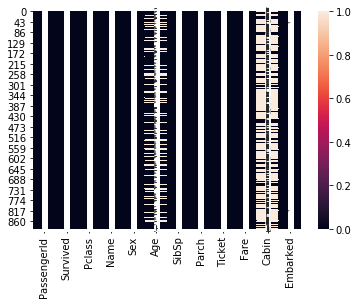

In [6]:
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


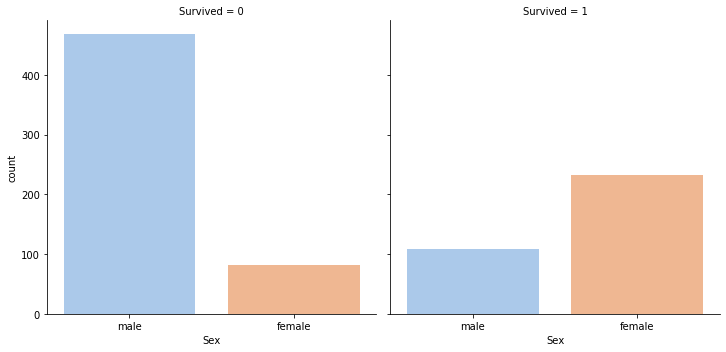

In [8]:
sns.set_palette('pastel')
sns.catplot(x='Sex',col='Survived',kind='count',data=df)
plt.show()

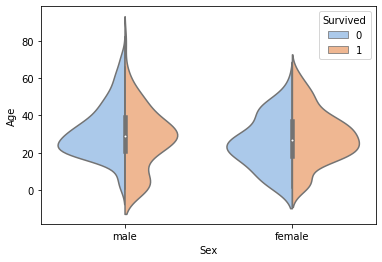

In [9]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df,split=True)
plt.show()

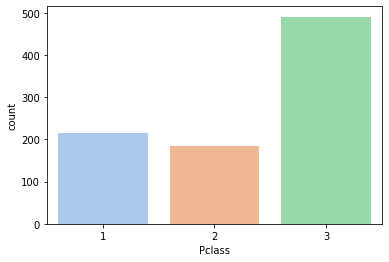

In [10]:
sns.countplot(df['Pclass'])
plt.show()

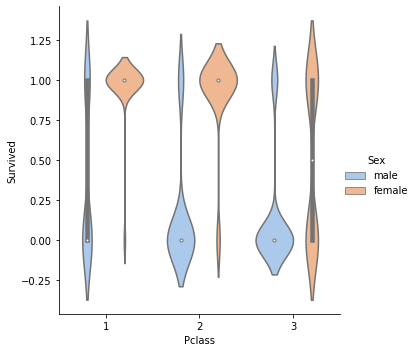

In [11]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=df,kind='violin')
plt.show()

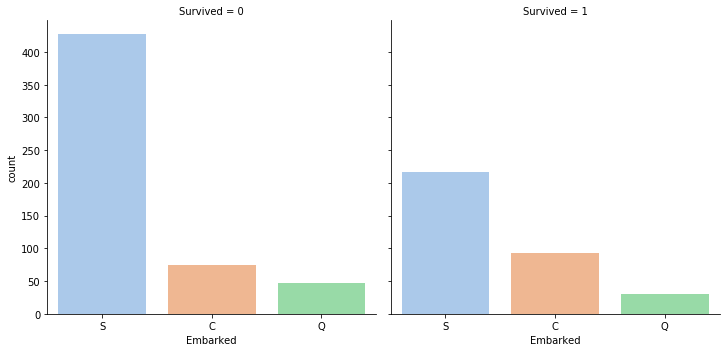

In [12]:
sns.catplot(x='Embarked',col='Survived',kind='count',data=df)
plt.show()

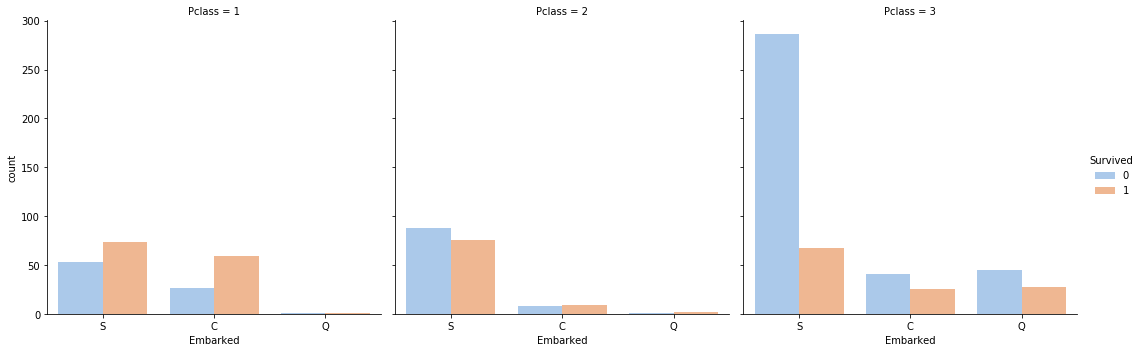

In [13]:
sns.catplot(x='Embarked',hue='Survived',kind='count',col='Pclass',data=df)
plt.show()

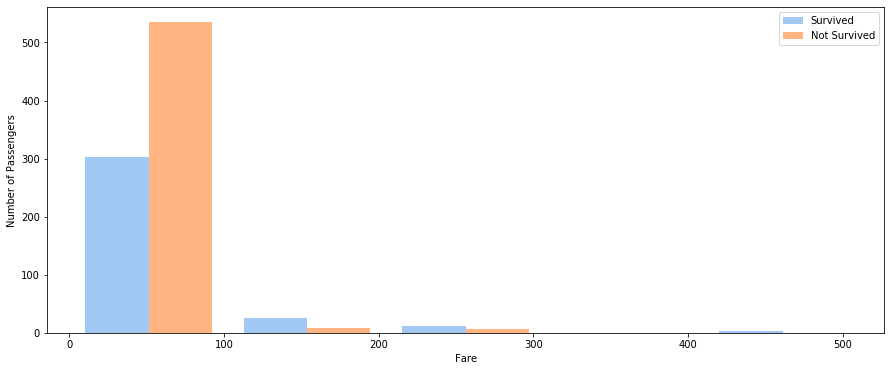

In [14]:
plt.figure(figsize=(15,6))
plt.hist([df[df['Survived']==1]['Fare'],df[df['Survived']==0]['Fare']],bins=5,label=['Survived','Not Survived'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


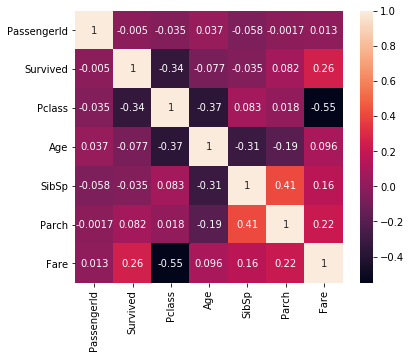

In [16]:
df_corr = df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(df_corr,annot=True)
plt.show()

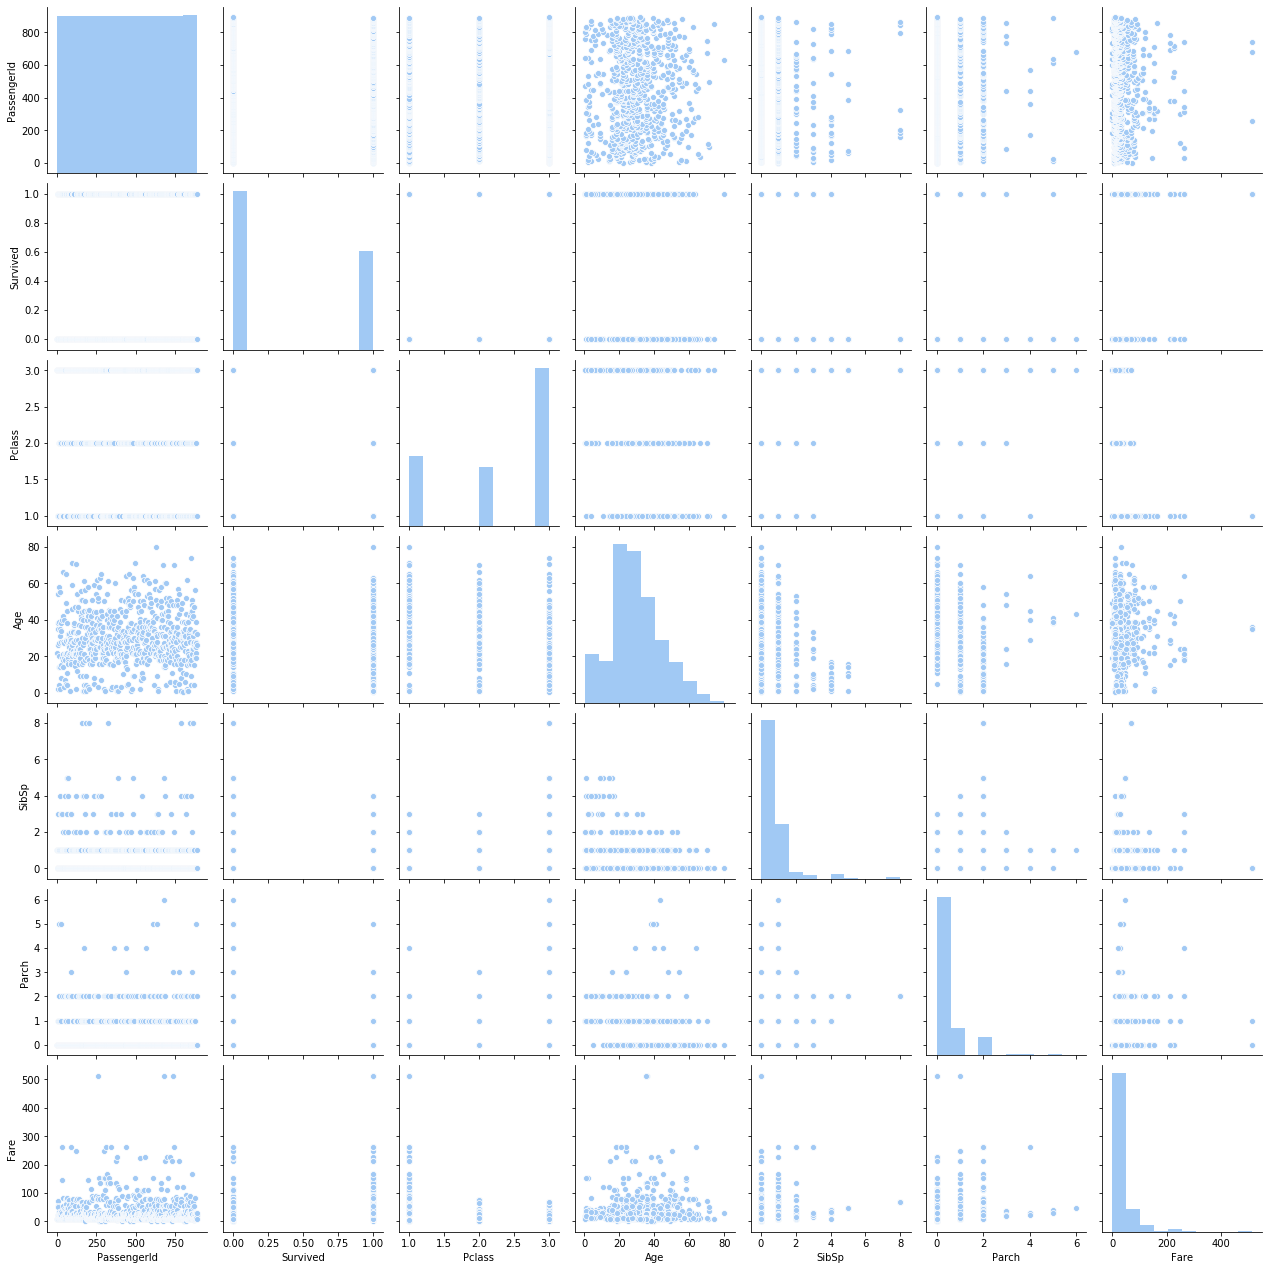

In [17]:
sns.pairplot(df)

In [18]:
df = df.drop(['Cabin'],axis=1)
df = df.drop(['PassengerId'],axis=1)
df = df.drop(['Name'],axis=1)
df = df.drop(['Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
df.shape

(891, 8)

In [20]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
df['Age'] = df['Age'].fillna((df['Age'].mean()))
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [22]:
df = df.dropna()
df.shape

(889, 8)

In [23]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S
887,1,1,0,19.000000,0,0,30.0000,S
888,0,3,0,29.699118,1,2,23.4500,S
889,1,1,1,26.000000,0,0,30.0000,C


In [25]:
df = pd.concat([df,pd.get_dummies(df['Embarked'],drop_first=False)],axis=1)
df = df.drop(['Embarked'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


In [26]:
df.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare        4.801440
C           1.591610
Q           2.944406
S          -1.006192
dtype: float64

In [27]:
columns = ['Age','SibSp','Parch','Fare']
for col in columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
        
df.skew()

Survived    0.484568
Pclass     -0.636998
Sex        -0.625625
Age         0.431720
SibSp       1.657860
Parch       1.671905
Fare        0.400109
C           1.591610
Q           2.944406
S          -1.006192
dtype: float64

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.000000,0.693147,0.000000,2.110213,0,0,1
1,1,1,0,38.000000,0.693147,0.000000,4.280593,1,0,0
2,1,3,0,26.000000,0.000000,0.000000,2.188856,0,0,1
3,1,1,0,35.000000,0.693147,0.000000,3.990834,0,0,1
4,0,3,1,35.000000,0.000000,0.000000,2.202765,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.000000,0.000000,2.639057,0,0,1
887,1,1,0,19.000000,0.000000,0.000000,3.433987,0,0,1
888,0,3,0,29.699118,0.693147,1.098612,3.196630,0,0,1
889,1,1,1,26.000000,0.000000,0.000000,3.433987,1,0,0


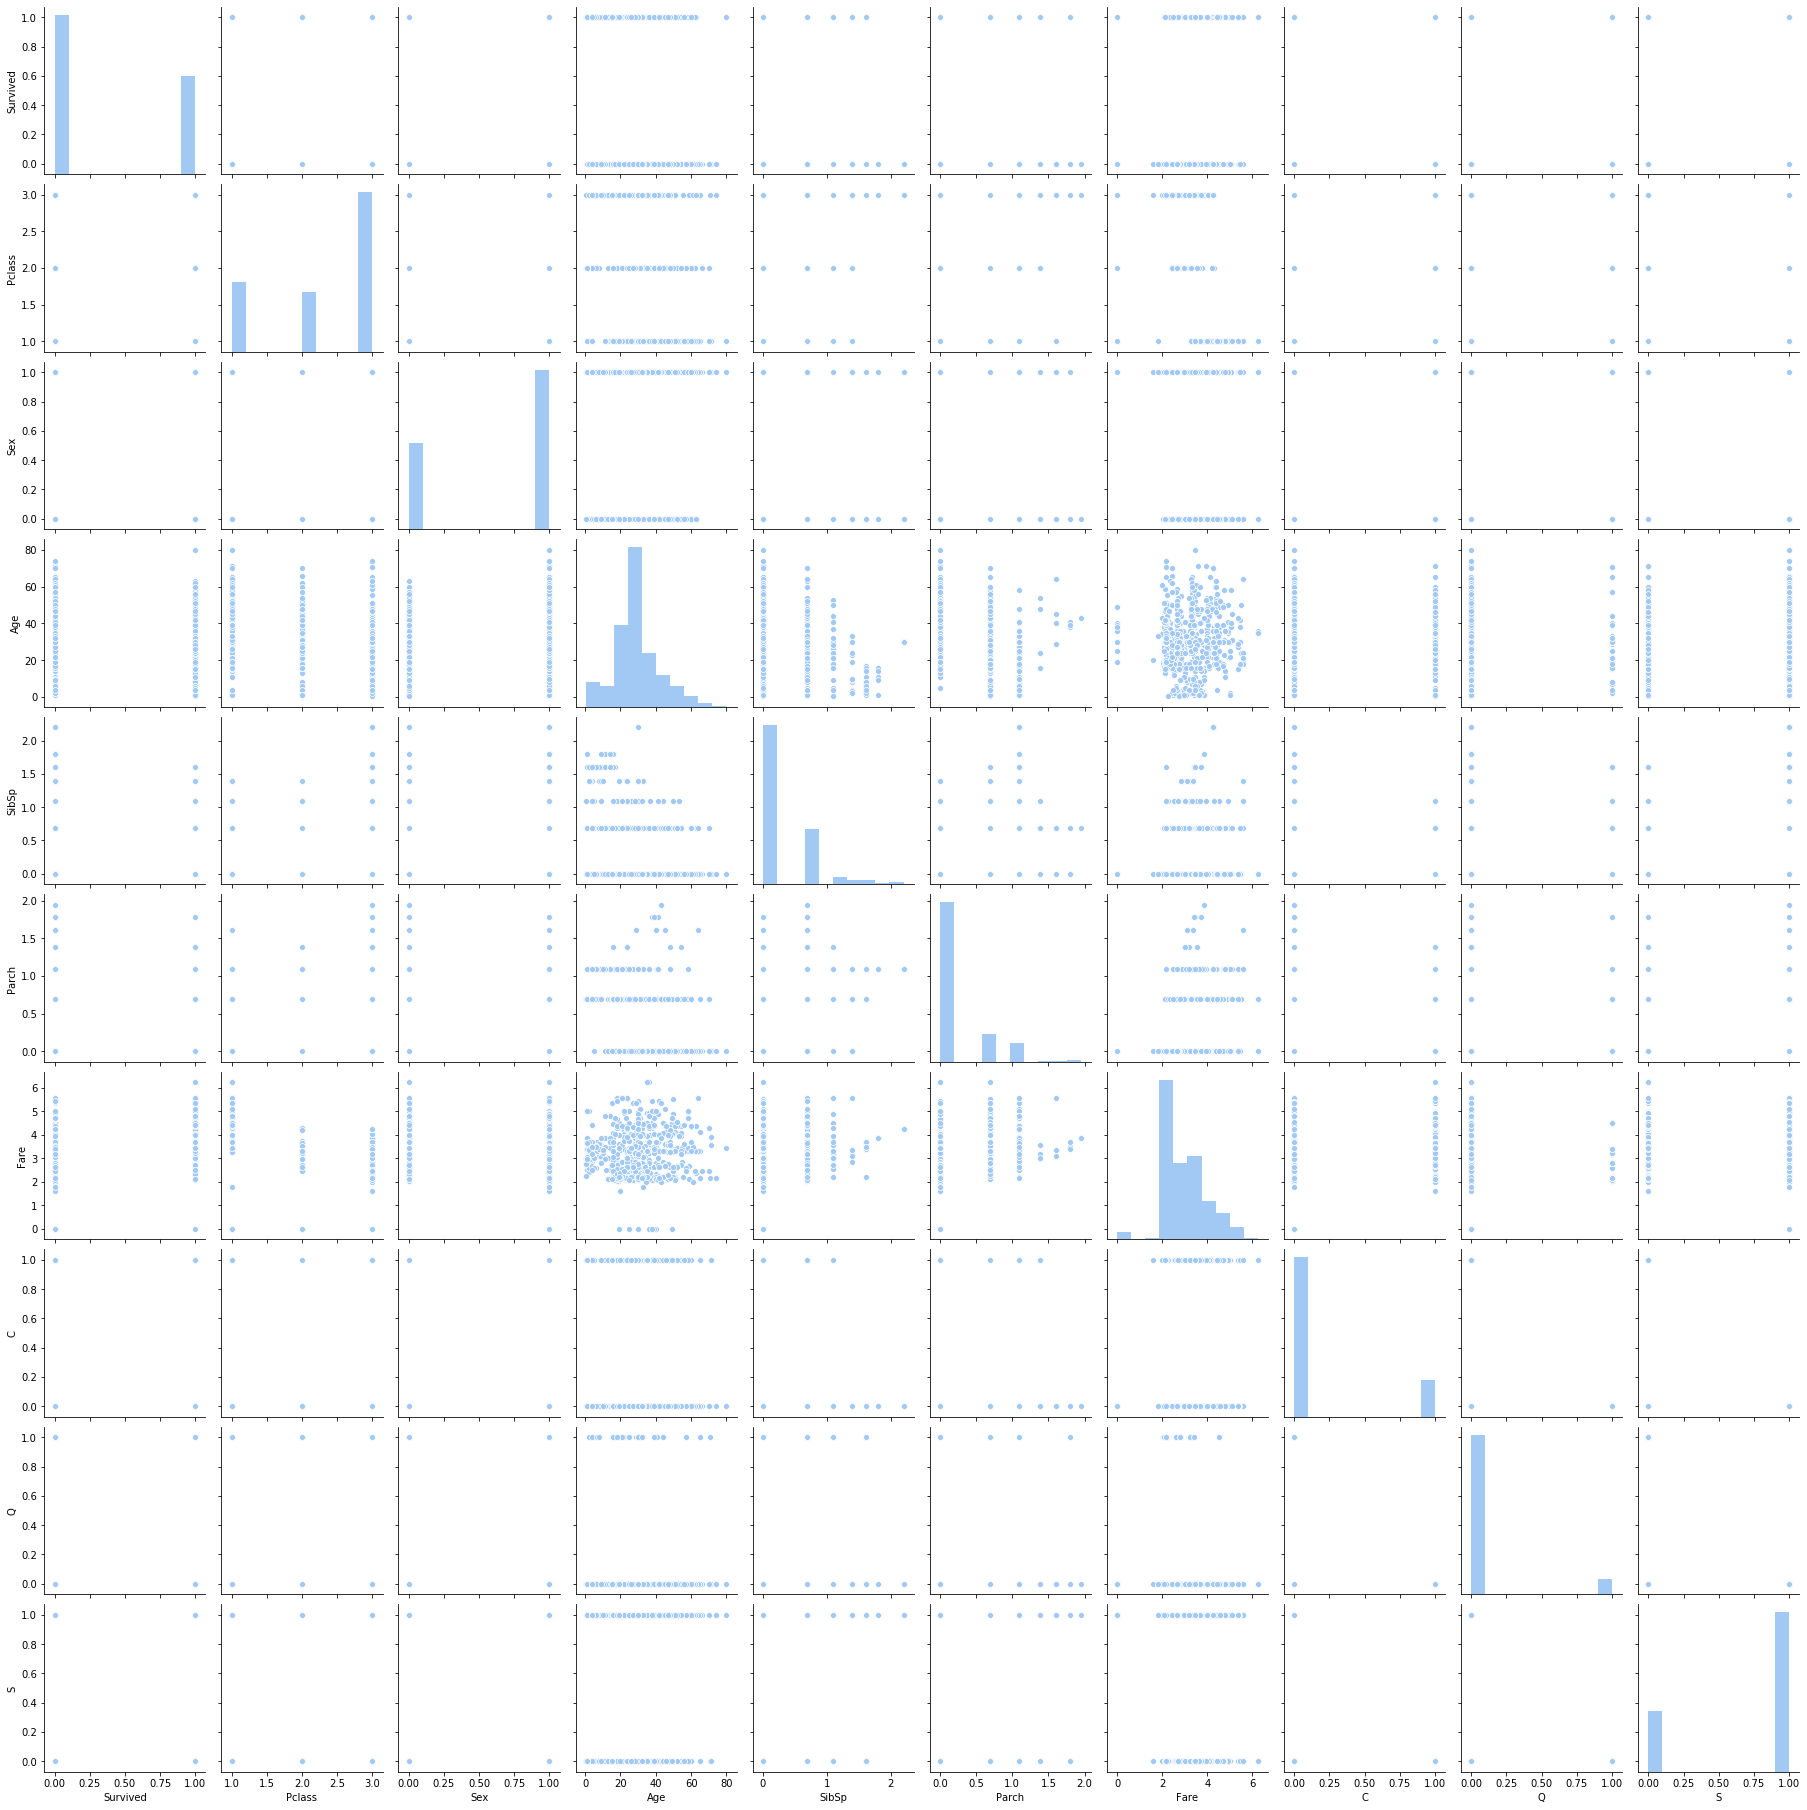

In [29]:
sns.pairplot(df)
plt.show()

In [30]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.653446,0.282473,0.218171,2.959024,0.188976,0.086614,0.724409
std,0.486260,0.834700,0.477538,12.968366,0.463165,0.412014,0.967750,0.391710,0.281427,0.447063
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,2.185579,0.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,2.737881,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,0.693147,0.000000,3.465736,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,2.197225,1.945910,6.240917,1.000000,1.000000,1.000000


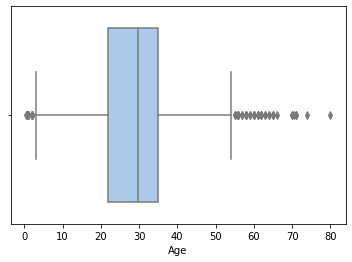

In [31]:
sns.boxplot(df['Age'])

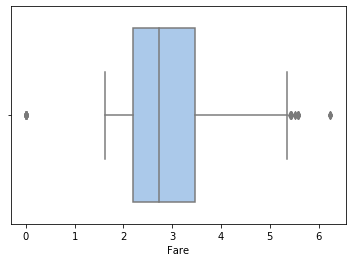

In [32]:
sns.boxplot(df['Fare'])

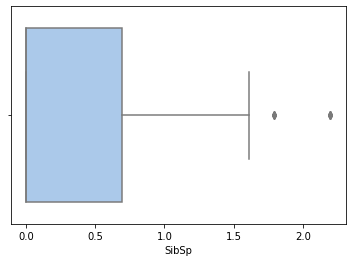

In [33]:
sns.boxplot(df['SibSp'])

# Model

In [34]:
y = df['Survived']
y.shape

(889,)

In [35]:
x = df.drop('Survived', axis = 1)
x.shape

(889, 9)

In [36]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,22.000000,0.693147,0.000000,2.110213,0,0,1
1,1,0,38.000000,0.693147,0.000000,4.280593,1,0,0
2,3,0,26.000000,0.000000,0.000000,2.188856,0,0,1
3,1,0,35.000000,0.693147,0.000000,3.990834,0,0,1
4,3,1,35.000000,0.000000,0.000000,2.202765,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0.000000,0.000000,2.639057,0,0,1
887,1,0,19.000000,0.000000,0.000000,3.433987,0,0,1
888,3,0,29.699118,0.693147,1.098612,3.196630,0,0,1
889,1,1,26.000000,0.000000,0.000000,3.433987,1,0,0


In [37]:
Model_accuracy = pd.DataFrame(columns = ['Model','Accuracy Score'])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=42)

In [40]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg = lg.predict(x_test)
acc = accuracy_score(y_test,predlg)
print('Accuracy score : ',accuracy_score(y_test,predlg))
print('Confusion matrix : \n',confusion_matrix(y_test,predlg))
print('Classification report : \n',classification_report(y_test,predlg))
Model_accuracy = Model_accuracy.append({'Model':'Logistic Regression','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.7921348314606742
Confusion matrix : 
 [[87 22]
 [15 54]]
Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       109
           1       0.71      0.78      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb = gnb.predict(x_test)
acc = accuracy_score(y_test,predgnb)
print('Accuracy score : ',accuracy_score(y_test,predgnb))
print('Confusion matrix : \n',confusion_matrix(y_test,predgnb))
print('Classification report : \n',classification_report(y_test,predgnb))
Model_accuracy = Model_accuracy.append({'Model':'GuassianNB','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.7584269662921348
Confusion matrix : 
 [[83 26]
 [17 52]]
Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       109
           1       0.67      0.75      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178



In [42]:
dtc = DecisionTreeClassifier()
grid_param = { 'criterion' : ['gini','entropy']}
gd_sr = GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.7890869693686595


In [43]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt = dt.predict(x_test)
acc = accuracy_score(y_test,preddt)
print('Accuracy score : ',accuracy_score(y_test,preddt))
print('Confusion matrix : \n',confusion_matrix(y_test,preddt))
print('Classification report : \n',classification_report(y_test,preddt))
Model_accuracy = Model_accuracy.append({'Model':'Decision Tree Classifier','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.7528089887640449
Confusion matrix : 
 [[85 24]
 [20 49]]
Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       109
           1       0.67      0.71      0.69        69

    accuracy                           0.75       178
   macro avg       0.74      0.74      0.74       178
weighted avg       0.76      0.75      0.75       178



In [44]:
mb=MultinomialNB()
mb.fit(x_train,y_train)
predmb=mb.predict(x_test)
acc = accuracy_score(y_test,predmb)
print('Accuracy score : ',accuracy_score(y_test,predmb))
print('Confusion matrix : \n',confusion_matrix(y_test,predmb))
print('Classification report : \n',classification_report(y_test,predmb))
Model_accuracy = Model_accuracy.append({'Model':'MultinomialNB','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.7247191011235955
Confusion matrix : 
 [[92 17]
 [32 37]]
Classification report : 
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       109
           1       0.69      0.54      0.60        69

    accuracy                           0.72       178
   macro avg       0.71      0.69      0.70       178
weighted avg       0.72      0.72      0.72       178



In [45]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
acc = accuracy_score(y_test,predknn)
print('Accuracy score : ',accuracy_score(y_test,predknn))
print('Confusion matrix : \n',confusion_matrix(y_test,predknn))
print('Classification report : \n',classification_report(y_test,predknn))
Model_accuracy = Model_accuracy.append({'Model':'KNN','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.797752808988764
Confusion matrix : 
 [[101   8]
 [ 28  41]]
Classification report : 
               precision    recall  f1-score   support

           0       0.78      0.93      0.85       109
           1       0.84      0.59      0.69        69

    accuracy                           0.80       178
   macro avg       0.81      0.76      0.77       178
weighted avg       0.80      0.80      0.79       178



In [46]:
svc = SVC()
grid_param = { 'kernel' : ['rbf','poly','linear']}
gd_sr = GridSearchCV(estimator=svc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'kernel': 'linear'}
0.7833940707180143


In [47]:
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
acc = accuracy_score(y_test,predsvc)
print('Accuracy score : ',accuracy_score(y_test,predsvc))
print('Confusion matrix : \n',confusion_matrix(y_test,predsvc))
print('Classification report : \n',classification_report(y_test,predsvc))
Model_accuracy = Model_accuracy.append({'Model':'SVC','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.797752808988764
Confusion matrix : 
 [[89 20]
 [16 53]]
Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.73      0.77      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [48]:
rf = RandomForestClassifier(n_estimators=100,random_state=40)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
acc = accuracy_score(y_test,predrf)
print('Accuracy score : ',accuracy_score(y_test,predrf))
print('Confusion matrix : \n',confusion_matrix(y_test,predrf))
print('Classification report : \n',classification_report(y_test,predrf))
Model_accuracy = Model_accuracy.append({'Model':'Random Forest','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.7921348314606742
Confusion matrix : 
 [[88 21]
 [16 53]]
Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       109
           1       0.72      0.77      0.74        69

    accuracy                           0.79       178
   macro avg       0.78      0.79      0.78       178
weighted avg       0.80      0.79      0.79       178



In [49]:
ad = AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
predad = ad.predict(x_test)
acc = accuracy_score(y_test,predad)
print('Accuracy score : ',accuracy_score(y_test,predad))
print('Confusion matrix : \n',confusion_matrix(y_test,predad))
print('Classification report : \n',classification_report(y_test,predad))
Model_accuracy = Model_accuracy.append({'Model':'Ada Boost','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.8146067415730337
Confusion matrix : 
 [[89 20]
 [13 56]]
Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       109
           1       0.74      0.81      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



In [50]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)
acc = accuracy_score(y_test,predgb)
print('Accuracy score : ',accuracy_score(y_test,predgb))
print('Confusion matrix : \n',confusion_matrix(y_test,predgb))
print('Classification report : \n',classification_report(y_test,predgb))
Model_accuracy = Model_accuracy.append({'Model':'Gradient Boost','Accuracy Score':acc},ignore_index=True)

Accuracy score :  0.8033707865168539
Confusion matrix : 
 [[91 18]
 [17 52]]
Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       109
           1       0.74      0.75      0.75        69

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [51]:
Model_accuracy.sort_values(by='Accuracy Score',ascending=False,ignore_index=True)

,Model,Accuracy Score
0,Ada Boost,0.814607
1,Gradient Boost,0.803371
2,KNN,0.797753
3,SVC,0.797753
4,Logistic Regression,0.792135
5,Random Forest,0.792135
6,GuassianNB,0.758427
7,Decision Tree Classifier,0.752809
8,MultinomialNB,0.724719


In [52]:
from sklearn.externals import joblib
joblib.dump(ad,'Titanic.pkl')

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Titanic.pkl']